# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style('darkgrid')
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import os
from bs4 import BeautifulSoup
import json
import requests
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry
from IPython.display import display
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
#import csv data from file

df_twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')
df_twitter_archive.head(1)

df = df_twitter_archive

df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [3]:
#get data from a web link

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
#extract the file name from link

url.split('/')[-1]
with open (os.path.join(url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [5]:
#import tsv file into dataframe

df_image_prediction = pd.read_csv('image_predictions.tsv', sep = '\t')
df_image_prediction 
df1 = df_image_prediction
df1.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [6]:
#extract information need for analysis from txt file in folder

df_list = []
with open('tweet_json.txt','r', encoding='utf-8') as file:
    for line in file.readlines():
        lines = json.loads(line)
        tweet_handle = lines['id']
        total_retweet = lines['retweet_count']
        total_favorite = lines['favorite_count']
        df_list.append({'tweet_handle':tweet_handle,'total_retweet':total_retweet,'total_favorite':total_favorite})
df_tweet_data = pd.DataFrame(df_list, columns=['tweet_handle','total_retweet','total_favorite'])

df2=df_tweet_data
df2.head(10)

,tweet_handle,total_retweet,total_favorite
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [7]:
#Investigate avalable data

df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

(2356, 17)

In [8]:
# Looking at the statistical description of df dataframe

df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
# investigate the number of missing values in our df dataframe
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [10]:
# investigate the number of duplicate rows in our df dataframe
df.duplicated().sum()

0

In [11]:
#Investigate avalable data

df1.info()
df1.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


(2075, 12)

In [12]:
# investigate the statistical description of df1 dataframe

df1.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [13]:
# investigate the number of missing values in our df1 dataframe
df1.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [14]:
# investigate the number of duplicate rows in our df1 dataframe
df1.duplicated().sum()

0

In [15]:
#Investigate avalable data

df2.info()
df2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_handle      2354 non-null int64
total_retweet     2354 non-null int64
total_favorite    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


(2354, 3)

In [16]:
# investigate the statistical description of df2 dataframe

df2.describe()

,tweet_handle,total_retweet,total_favorite
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [17]:
# investigate the number of missing values in our df2 dataframe
df2.isnull().sum()

tweet_handle      0
total_retweet     0
total_favorite    0
dtype: int64

In [18]:
# investigate the number of duplicate rows in our df dataframe
df2.duplicated().sum()

0

Quality issues

1. Inconsistent column title (tweet_handle in place of tweet_id)

2. Wrong data type: For tweet ID in df1, df2, df3, the correct data type is String. wrong data type in df1 timestamp column. Confidence level can be converted to percentage fore easy analysis

3. tweet id with values in retweet column needs to be removed

4. Null value in the expanded url which needs to be dropped

5. Dog names with small letter are not dogs, needs to be dropped

6. Inconsistent letter case for data in P1, P2, P3 some are lower case, while others are uppercase


7. Tweet IDs with value in 'retweeted_status_id, retweeted_status_user _id, and retweeted_status _timestamp column are not relevant for our analysis.

8. remove column retweeted_status_id, retweeted_status_timestamp,retweeted_status_user_id. contains a lot of null cell



Tidiness issues
1.The dog stages needs to be merged into a single column

2.Merge df1, df2, df3 into a single file

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [19]:
#Make copies of original pieces of data
df_copy = df.copy()
df1_copy = df1.copy()
df2_copy = df2.copy()

#### Issue 1: 
Inconsistent column title (tweet_handle in place of tweet_id)

#### Define:
rename column tweet_handle to tweet_id in df2 

#### Code

In [20]:
#rename column title

df2_copy.rename(columns = {'tweet_handle':'tweet_id'}, inplace = True)

#### Test

In [21]:
#verify if column has been renamed

df2_copy.columns

Index(['tweet_id', 'total_retweet', 'total_favorite'], dtype='object')

#### Issue 2: 
Wrong data type: For tweet ID in df1, df2, df3, the correct data type is String. wrong data type in df1 timestamp column. Confidence level can be converted to percentage fore easy analysis

#### Define:

change int to string 

#### Code

In [22]:
#Change data type

df_copy.tweet_id = df_copy.tweet_id.astype(str)
df1_copy.tweet_id = df1_copy.tweet_id.astype(str)
df2_copy.tweet_id = df2_copy.tweet_id.astype(str)

#### Test

In [23]:
df_copy.tweet_id.dtypes, df1_copy.tweet_id.dtypes,df2_copy.tweet_id.dtypes 

(dtype('O'), dtype('O'), dtype('O'))

### Issue #2 (Cont):
Wrong data type: For tweet ID in df1, df2, df3, the correct data type is String. wrong data type in df1 timestamp column. Confidence level can be converted to percentage fore easy analysis

#### Define

Change to datetime

#### Code

In [24]:
#change data type

df_copy.timestamp = pd.to_datetime(df_copy.timestamp)

#### Test

In [25]:
df_copy.timestamp.dtypes

dtype('<M8[ns]')

#### Issue 2 (Cont)

Wrong data type: For tweet ID in df1, df2, df3, the correct data type is String. wrong data type in df1 timestamp column. Confidence level can be converted to percentage fore easy analysis

#### Define

convert confidenceLevel to percentage

#### Code

In [26]:
#arithmetic function to convert a column to percentage

df1_copy['p1_conf'] = (df1_copy['p1_conf'] * 100).round(0)
df1_copy['p2_conf'] = (df1_copy['p2_conf'] * 100).round(0)
df1_copy['p3_conf'] = (df1_copy['p3_conf'] * 100).round(0)




#### Test

In [27]:
df1_copy.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,47.0,True,collie,16.0,True,Shetland_sheepdog,6.0,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,51.0,True,miniature_pinscher,7.0,True,Rhodesian_ridgeback,7.0,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,60.0,True,malinois,14.0,True,bloodhound,12.0,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,41.0,True,redbone,36.0,True,miniature_pinscher,22.0,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,56.0,True,Rottweiler,24.0,True,Doberman,15.0,True


#### Issue 3

tweet id with values in retweet column needs to be removed

#### Define

extract tweet_id with null in retweet columns in df_copy

#### Code

In [28]:
#remove column wil null retweet value

df_copy = df_copy[df_copy['retweeted_status_id'].isnull()]
df_copy = df_copy[df_copy['retweeted_status_timestamp'].isnull()]
df_copy = df_copy[df_copy['retweeted_status_user_id'].isnull()]

#### Test

In [29]:
df_copy.retweeted_status_id.notnull().sum(),
df_copy.retweeted_status_timestamp.notnull().sum(),
df_copy.retweeted_status_user_id.notnull().sum()

0

#### Issue 4

Null value in the expanded url which needs to be dropped

#### Define 

drop na in expanded url

#### Code

In [30]:
#Drop column

df_copy.drop(columns=['expanded_urls'],axis=1,inplace=True)

Test

In [31]:
df_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'rating_numerator', 'rating_denominator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### Issue 5

Dog names with small letter are not dogs, needs to be dropped

#### Define 

replace dog name in lowercase with 'None'

#### Code

In [32]:
is_not_name = []

for i in df_copy.name:
    if i.islower() and i not in is_not_name:
        is_not_name.append(i)
df_copy.name.replace(is_not_name, 'None', inplace = True)

#### Test

In [33]:
#change column case

for i in df_copy.name:
    if i.islower():
        print(i)

#### Issue 6

Inconsistent letter case for data in P1, P2, P3 some are lower case, while others are uppercase

#### Define

Convert all to uppercase

#### Code

In [34]:
df1_copy['p1'] = df1_copy['p1'].str.upper()
df1_copy['p2'] = df1_copy['p2'].str.upper()
df1_copy['p3'] = df1_copy['p3'].str.upper()

#### Test 

In [35]:
df1_copy.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,WELSH_SPRINGER_SPANIEL,47.0,True,COLLIE,16.0,True,SHETLAND_SHEEPDOG,6.0,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,REDBONE,51.0,True,MINIATURE_PINSCHER,7.0,True,RHODESIAN_RIDGEBACK,7.0,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,GERMAN_SHEPHERD,60.0,True,MALINOIS,14.0,True,BLOODHOUND,12.0,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,RHODESIAN_RIDGEBACK,41.0,True,REDBONE,36.0,True,MINIATURE_PINSCHER,22.0,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,MINIATURE_PINSCHER,56.0,True,ROTTWEILER,24.0,True,DOBERMAN,15.0,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,BERNESE_MOUNTAIN_DOG,65.0,True,ENGLISH_SPRINGER,26.0,True,GREATER_SWISS_MOUNTAIN_DOG,2.0,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,BOX_TURTLE,93.0,False,MUD_TURTLE,5.0,False,TERRAPIN,2.0,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,CHOW,69.0,True,TIBETAN_MASTIFF,6.0,True,FUR_COAT,5.0,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,SHOPPING_CART,96.0,False,SHOPPING_BASKET,1.0,False,GOLDEN_RETRIEVER,1.0,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,MINIATURE_POODLE,20.0,True,KOMONDOR,19.0,True,SOFT-COATED_WHEATEN_TERRIER,8.0,True


#### Issue 7

Tweet IDs with value in 'retweeted_status_id, retweeted_status_user _id, and retweeted_status _timestamp column are not relevant for our analysis.

#### Define
Drop tweet IDs with value in 'retweeted_status_id, retweeted_status_user id, and retweetedstatus _timestamp column

#### Code

In [36]:
# Drop retweeted rows
df_copy = df_copy[df_copy.retweeted_status_id.isnull()]
df_copy = df_copy[df_copy.retweeted_status_user_id.isnull()]
df_copy = df_copy[df_copy.retweeted_status_timestamp.isnull()]

#### Test



In [37]:
df_copy.retweeted_status_id.notnull().sum(),df_copy.retweeted_status_user_id.notnull().sum(),df_copy.retweeted_status_timestamp.notnull().sum()



(0, 0, 0)

#### Issue 8

remove column retweeted_status_id, retweeted_status_timestamp,retweeted_status_user_id. contains a lot of null cell

#### Define 

Drop column retweeted_status_id, retweeted_status_timestamp,retweeted_status_user_id

#### Code

In [38]:
#Drop column not needed for analysis

df_copy.drop(['retweeted_status_id', 'retweeted_status_user_id',
             'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1, inplace = True)


#### Test

In [39]:
df_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Tidiness Issues

#### Issue 1

The dog stages needs to be merged into a single column

#### Define 

merge column ( 'doggo', 'floofer', 'pupper', 'puppo')

#### Code

In [40]:
#merge cell 

df_copy.doggo.replace('None', '', inplace=True)
df_copy.floofer.replace('None', '', inplace=True)
df_copy.pupper.replace('None', '', inplace=True)
df_copy.puppo.replace('None', '', inplace=True)

df_copy['merge_stage'] = df_copy.doggo + df_copy.floofer + df_copy.pupper + df_copy.puppo

df_copy.loc[df_copy.merge_stage == 'doggopupper', 'merge_stage'] = 'doggo,pupper'
df_copy.loc[df_copy.merge_stage == 'doggopuppo', 'merge_stage'] = 'doggo,puppo'
df_copy.loc[df_copy.merge_stage == 'doggofloofer', 'merge_stage'] = 'doggo,floofer'

In [41]:
df_copy.drop(['doggo', 'floofer',
             'pupper', 'puppo'], axis = 1, inplace = True)


df_copy['merge_stage'] = df_copy['merge_stage'].replace('', 'none')


#### Test

In [42]:
df_copy.head(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,merge_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,none
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,none
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,none
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,none
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,none
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,None,none
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,none
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,None,none
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,Zoey,none
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo


#### Issue 2

Merge df1, df2, df3 into a single file


#### Define 

Merge df_copy, df1_copy, df2_copy

#### Code

In [43]:
#merge all available df into a single file

twitter_data = pd.merge(df_copy, df1_copy, on='tweet_id', how='inner').merge(df2_copy, on='tweet_id', how='inner')

#### Test

In [44]:
#check if table is consistent with expect column titles

twitter_data.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'merge_stage', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'total_retweet', 'total_favorite'],
      dtype='object')

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [45]:
#Store data

twitter_data.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [46]:
#Read CSV file from folder

df3 = pd.read_csv('twitter_archive_master.csv')

In [47]:
df3.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,merge_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,total_retweet,total_favorite
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,none,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,10.0,False,BAGEL,9.0,False,BANANA,8.0,False,8853,39467


In [48]:
df3.info()
df3.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 21 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
merge_stage           1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
total_retweet         1994 non-null int64
total_favorite        1994 non-null int64

(1994, 21)

In [49]:
# Checking the statistical description of twitter data archive
df3.describe()


,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,total_retweet,total_favorite
count,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,7.358508e+17,12.280843,10.532096,1.203109,59.399198,13.439819,6.016550,2766.753260,8895.725677
std,6.747816e+16,41.497718,7.320710,0.560777,27.208956,10.074666,5.097073,4674.698447,12213.193181
min,6.660209e+17,0.000000,2.000000,1.000000,4.000000,0.000000,0.000000,16.000000,81.000000
25%,6.758475e+17,10.000000,10.000000,1.000000,36.000000,5.000000,2.000000,624.750000,1982.000000
50%,7.084748e+17,11.000000,10.000000,1.000000,59.000000,12.000000,5.000000,1359.500000,4136.000000
75%,7.877873e+17,12.000000,10.000000,1.000000,85.000000,19.750000,9.000000,3220.000000,11308.000000
max,8.924206e+17,1776.000000,170.000000,4.000000,100.000000,49.000000,27.000000,79515.000000,132810.000000


In [50]:
# count unique vales in name

df3['name'].value_counts()

None         644
Charlie       11
Lucy          10
Oliver        10
Cooper        10
Tucker         9
Penny          9
Sadie          8
Winston        8
Daisy          7
Toby           7
Lola           7
Koda           6
Bo             6
Stanley        6
Bella          6
Jax            6
Dave           5
Leo            5
Scout          5
Rusty          5
Buddy          5
Bailey         5
Louis          5
Milo           5
Oscar          5
Chester        5
Duke           4
Bentley        4
Derek          4
            ... 
Rumble         1
Tito           1
Emmie          1
Kloey          1
Geno           1
Gunner         1
Shnuggles      1
Ruffles        1
Jessiga        1
Shikha         1
Obi            1
Jockson        1
Noosh          1
Ito            1
Tess           1
Bode           1
Tonks          1
Gustav         1
Oshie          1
Blipson        1
Mason          1
Ronnie         1
Molly          1
Joshwa         1
Akumi          1
Sprinkles      1
Adele          1
Jed           

In [51]:
#get percentage value of all available dog name and dogs dtata without name

((df3['name'].value_counts()/df3['name'].count())*100).round(1)

None         32.3
Charlie       0.6
Lucy          0.5
Oliver        0.5
Cooper        0.5
Tucker        0.5
Penny         0.5
Sadie         0.4
Winston       0.4
Daisy         0.4
Toby          0.4
Lola          0.4
Koda          0.3
Bo            0.3
Stanley       0.3
Bella         0.3
Jax           0.3
Dave          0.3
Leo           0.3
Scout         0.3
Rusty         0.3
Buddy         0.3
Bailey        0.3
Louis         0.3
Milo          0.3
Oscar         0.3
Chester       0.3
Duke          0.2
Bentley       0.2
Derek         0.2
             ... 
Rumble        0.1
Tito          0.1
Emmie         0.1
Kloey         0.1
Geno          0.1
Gunner        0.1
Shnuggles     0.1
Ruffles       0.1
Jessiga       0.1
Shikha        0.1
Obi           0.1
Jockson       0.1
Noosh         0.1
Ito           0.1
Tess          0.1
Bode          0.1
Tonks         0.1
Gustav        0.1
Oshie         0.1
Blipson       0.1
Mason         0.1
Ronnie        0.1
Molly         0.1
Joshwa        0.1
Akumi     

In [52]:
#count the values of unique dog states

df3['merge_stage'].value_counts()

none             1688
pupper            203
doggo              63
puppo              22
doggo,pupper        9
floofer             7
doggo,floofer       1
doggo,puppo         1
Name: merge_stage, dtype: int64

In [53]:
((df3['merge_stage'].value_counts()/df3['merge_stage'].count())*100).round(1)

none             84.7
pupper           10.2
doggo             3.2
puppo             1.1
doggo,pupper      0.5
floofer           0.4
doggo,floofer     0.1
doggo,puppo       0.1
Name: merge_stage, dtype: float64

In [54]:
# get tweet ID with maximum and minimum retweet


print(df3[['tweet_id']][df3.total_retweet == df3.total_retweet.max()])
print(df3[['tweet_id']][df3.total_retweet == df3.total_retweet.min()])

               tweet_id
775  744234799360020481
                tweet_id
1977  666102155909144576


In [55]:
# get tweet ID with maximum and minimum likes

print(df3[['tweet_id']][df3.total_favorite == df3.total_favorite.max()])
print(df3[['tweet_id']][df3.total_favorite == df3.total_favorite.min()])

               tweet_id
309  822872901745569793
                tweet_id
1977  666102155909144576


In [56]:
#vale count of
df3['p1_dog'].value_counts()


True     1477
False     517
Name: p1_dog, dtype: int64

In [57]:
df3['p2_dog'].value_counts()


True     1495
False     499
Name: p2_dog, dtype: int64

In [58]:
df3['p3_dog'].value_counts()

True     1446
False     548
Name: p3_dog, dtype: int64

In [59]:
# get tweet ID with maximum like

df3.nlargest(1,columns='total_favorite',keep='first')


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,merge_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,total_retweet,total_favorite
309,822872901745569793,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,13,10,None,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,...,20.0,True,LABRADOR_RETRIEVER,16.0,True,IRISH_TERRIER,7.0,True,48265,132810


In [60]:
# get tweet ID with minimum like

df3.nsmallest(1,columns='total_favorite',keep='first')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,merge_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,total_retweet,total_favorite
1977,666102155909144576,2015-11-16 03:55:04,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,11,10,None,none,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,1,...,30.0,True,NEWFOUNDLAND,15.0,True,BORZOI,13.0,True,16,81


In [61]:
# get tweet ID with maximum retweet

df3.nlargest(1,columns='total_retweet',keep='first')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,merge_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,total_retweet,total_favorite
775,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,13,10,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,...,83.0,True,ICE_BEAR,4.0,False,WHIPPET,2.0,True,79515,131075


In [62]:
# get tweet ID with minimum retweet

df3.nsmallest(1,columns='total_retweet',keep='first')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,merge_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,total_retweet,total_favorite
1977,666102155909144576,2015-11-16 03:55:04,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,11,10,None,none,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,1,...,30.0,True,NEWFOUNDLAND,15.0,True,BORZOI,13.0,True,16,81


### Insights:
1.A total of 644 dogs have no name which accounts for 32% of the sample data

2.Tweet_id 744234799360020481 have the highest number of retweet (79515) and 666102155909144576 the lowest number of retweet (16)

3.Tweet_id 822872901745569793 have the highest number of likes (132810) and 666102155909144576 the lowest number of likes (81)

4.The percentage of the dogs that their stage was not stated is 87.65%, indicating a total of 1688

### Visualization

In [63]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 21 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
merge_stage           1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
total_retweet         1994 non-null int64
total_favorite        1994 non-null int64

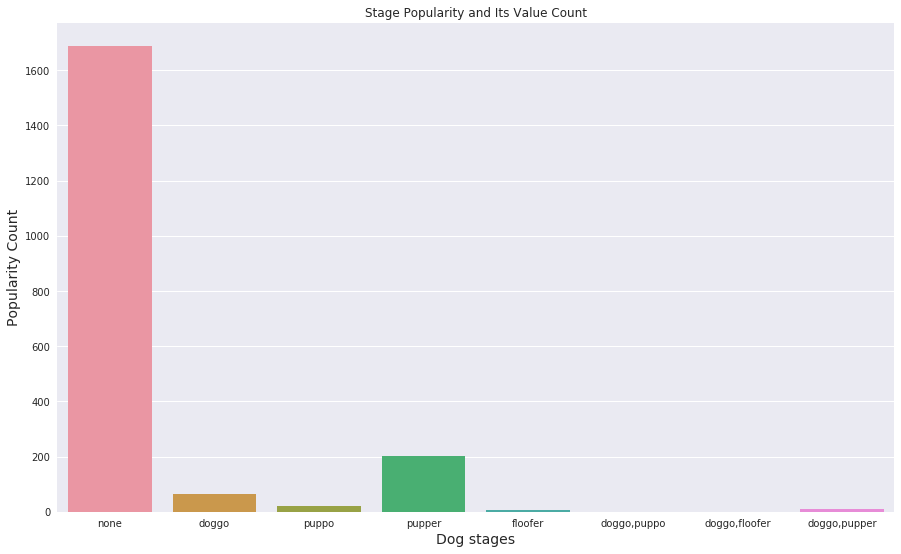

In [64]:
# What dogstage is the most popular?. 
sns.set(rc={'figure.figsize':(15, 9)})
sns.countplot(df3.merge_stage)
plt.title('Stage Popularity and Its Value Count')
plt.xlabel('Dog stages', fontsize=14)
plt.ylabel('Popularity Count', fontsize=14)
plt.show()



#### Observation 

Pupper and Doggo have the higest number of popularity in the available dataset

Text(0.5,1,'Tweet Image Count')

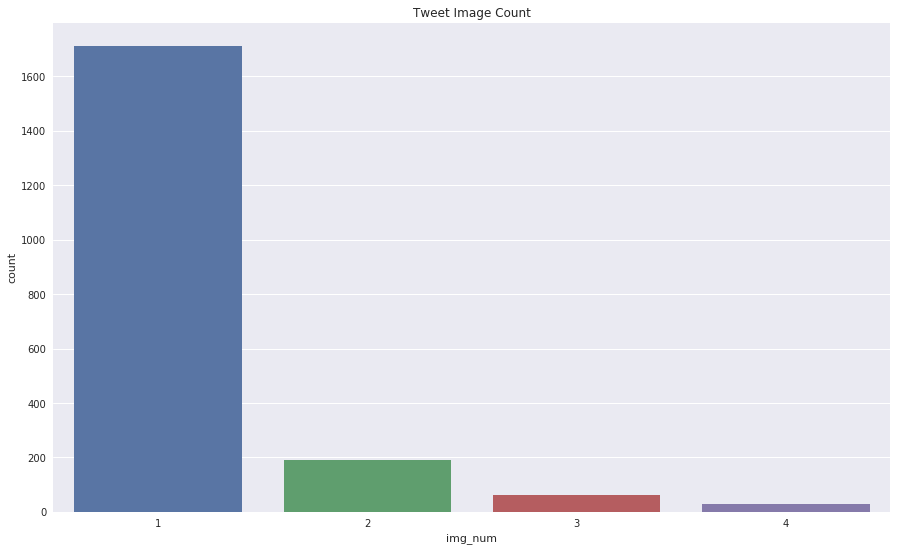

In [65]:
sns.countplot(df3.img_num)
plt.title('Tweet Image Count')